In [80]:
import csv
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
import math

In [81]:
EPS = 1e-4

Выборка данных с интервальной неопределённостью, число отсчётов в выборке равно 200:

In [82]:
data = []
with open('Chanel_1_400nm_2mm.csv') as csvfile:
  spamreader = csv.reader(csvfile, delimiter=";")
  for row in spamreader:
    data.append([float(row[0]), float(row[1])])

# Построение исходных данных:



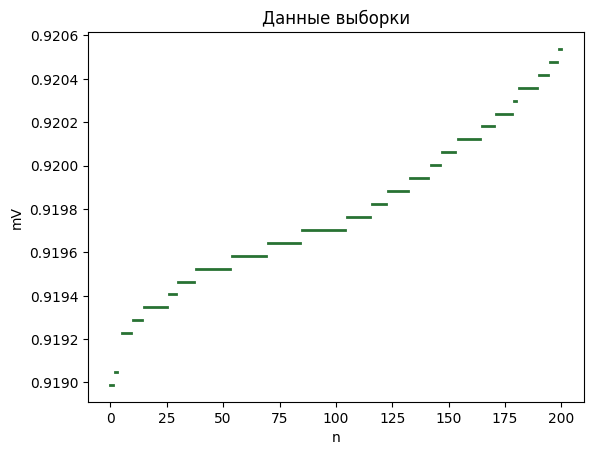

In [5]:
count = 0
prev_count = 0
cur_d = data[0][0]

for t in data:
  if t[0] == cur_d:
    count = count + 1
  else:
    plt.plot([prev_count, count], [cur_d, cur_d], '#287233', linewidth=2)
    count = count + 1
    prev_count = count
    cur_d = t[0]
plt.plot([prev_count, count], [cur_d, cur_d], '#287233', linewidth=2)
plt.title('Данные выборки')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("result1.png")


# Постоение диаграммы рассеяния


Диаграмма рассеяния выборки с уравновешенным интервалом погрешности:

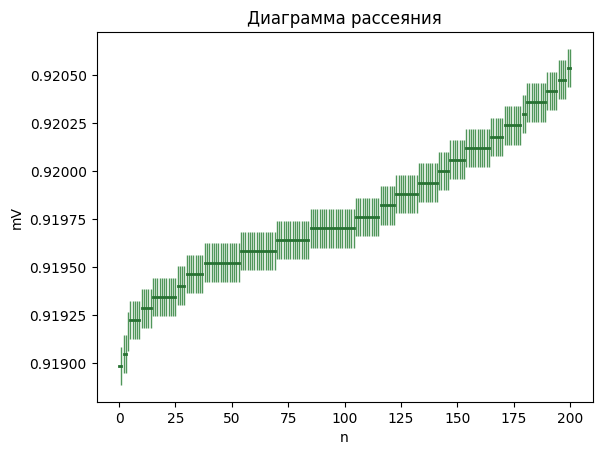

In [11]:
data_n = [t for t in range(1, len(data) + 1)]
data1 = [[data[i][0] - EPS, data[i][0] + EPS] for i in range(len(data))]

for i in range(len(data1)):
  plt.vlines(data_n[i], data1[i][0], data1[i][1], colors = "#50965a", lw = 1)

count = 0
prev_count = 0
cur_d = data[0][0]

for t in data:
  if t[0] == cur_d:
    count = count + 1
  else:
    plt.plot([prev_count, count], [cur_d, cur_d], '#287233', linewidth=2)
    count = count + 1
    prev_count = count
    cur_d = t[0]
plt.plot([prev_count, count], [cur_d, cur_d], '#287233', linewidth=2)
    
plt.title('Диаграмма рассеяния')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("result2.png")


# Вычисление моды выборки и максимальной клики:

Построение графика частот при вычислении моды выборки:

In [13]:
def findMu(data1, interval):
    count = 0
    for i in range(len(data1)):
        if ((data1[i][0] + EPS) > (interval[1])) and ((data1[i][0] - EPS) < (interval[0])):
            count = count + 1
    return count

In [14]:
def findAllMu(data1, z):
    mu = []
    for i in range(len(z)):
        mu.append(findMu(data1, z[i]))
    return mu

In [15]:
def findMax(mu):
    max = mu[0]
    for i in range(len(mu)):
        if mu[i] > max:
            max = mu[i]
    return max

In [17]:
def findUpMin(data1):
    min = data1[0][0] + EPS
    for i in range(len(data1)):
        if data1[i][0] + EPS < min:
            min = data1[i][0] + EPS
    return min

In [18]:
def findMid(min, max):
    return (max + min) / 2

In [16]:
def findDownMax(data1):
    max = data1[0][0] - EPS
    for i in range(len(data1)):
        if data1[i][0] - EPS > max:
            max = data1[i][0] - EPS
    return max

Размер максимальной клики =  51
Индексы: [142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167]
Мода: [ 0.9196246 , 0.919663 ]


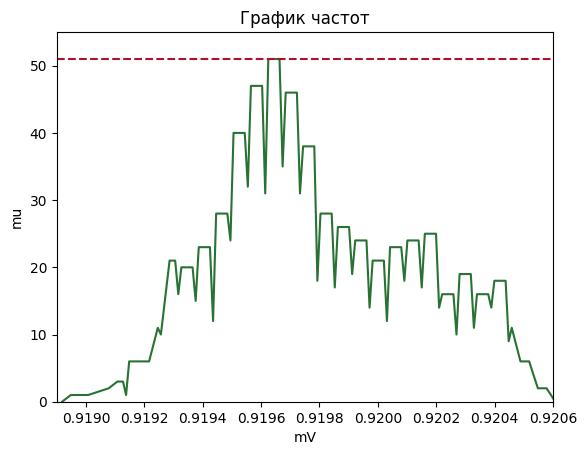

In [58]:
up_count = 0
down_count = 0
tmp_z = []

for i in range(2 * len(data)):
  if down_count < len(data):
    if (data[down_count][0] - EPS < data[up_count][0] + EPS):
      tmp_z.append(data[down_count][0] - EPS)
      down_count = down_count + 1
    else:
      tmp_z.append(data[up_count][0] + EPS)
      up_count = up_count + 1
  else:
    tmp_z.append(data[up_count][0] + EPS)
    up_count = up_count + 1

z = []
for i in range(len(tmp_z) - 1):
  z.append([tmp_z[i], tmp_z[i + 1]])

mu = findAllMu(data, z)
mV = []
mx = findMax(mu)
print('Размер максимальной клики = ', mx)

maxIntervals = []
index = []
for i in range(len(mu)):
  if mu[i] == mx:
    maxIntervals.append([z[i][0], z[i][1]])
    index.append(i+1)
print('Индексы:', index)

print('Мода: [',maxIntervals[0][0], ',', maxIntervals[len(maxIntervals) - 1][1], ']')
plt.axis([0.9189, 0.9206, 0, 55])
for i in range(len(z)):
  mV.append(findMid(z[i][0], z[i][1]))

plt.plot(mV, mu, '#287233')
plt.hlines(findMax(mu), 0.9189, 0.9206, '#b01030', '--')
plt.title('График частот')
plt.xlabel('mV')
plt.ylabel('mu')
plt.savefig("result3.png")

График, показывающий элементы выборки, в которые входит мода:

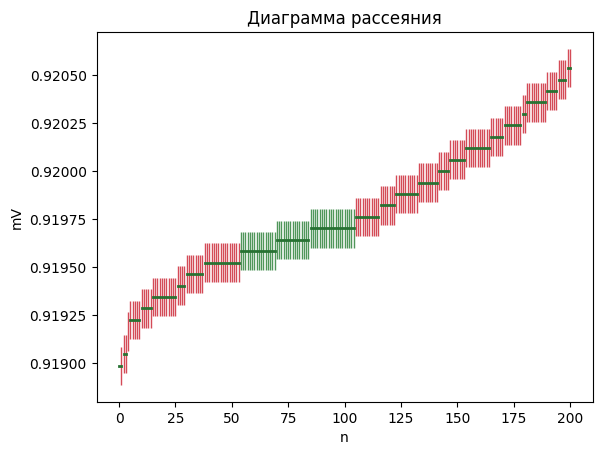

In [28]:
data_n = [t for t in range(1, len(data) + 1)]
data1 = [[data[i][0] - EPS, data[i][0] + EPS] for i in range(len(data))]

for i in range(len(data1)):
  if (data1[i][0] < 0.9196246) and (data1[i][1] > 0.919663):
    plt.vlines(data_n[i], data1[i][0], data1[i][1], colors = "#50965a", lw = 1)
  else:
    plt.vlines(data_n[i], data1[i][0], data1[i][1], colors = "#d44b57", lw = 1)

count = 0
prev_count = 0
cur_d = data[0][0]

for t in data:
  if t[0] == cur_d:
    count = count + 1
  else:
    plt.plot([prev_count, count], [cur_d, cur_d], '#287233', linewidth=2)
    count = count + 1
    prev_count = count
    cur_d = t[0]
plt.plot([prev_count, count], [cur_d, cur_d], '#287233', linewidth=2)
plt.title('Диаграмма рассеяния')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("result4.png")

# Оптимизация по Оскорбину:

Результаты работы кода в MATLAB:

oskorbin_center_k = 0.919763;

w = 7.7490

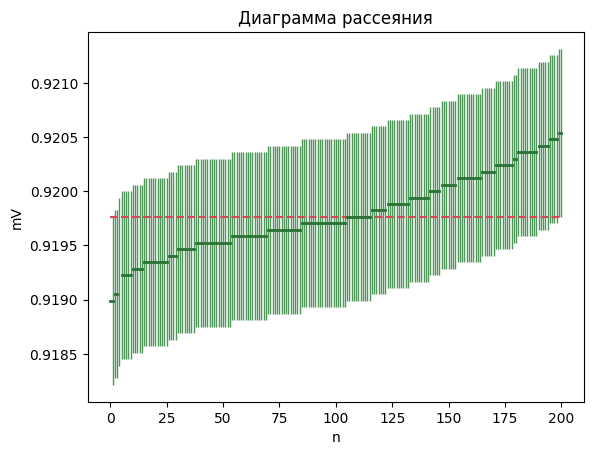

In [32]:
data_n = [t for t in range(1, len(data) + 1)]
data1 = [[data[i][0] - EPS * 7.7490, data[i][0] + EPS * 7.7490] for i in range(len(data))]

for i in range(len(data1)):
  plt.vlines(data_n[i], data1[i][0], data1[i][1], colors = "#50965a", lw = 1)
plt.hlines(0.919763, 0, 200, "#d44b57", "--")

count = 0
prev_count = 0
cur_d = data[0][0]

for t in data:
  if t[0] == cur_d:
    count = count + 1
  else:
    plt.plot([prev_count, count], [cur_d, cur_d], '#287233', linewidth=2)
    count = count + 1
    prev_count = count
    cur_d = t[0]
plt.plot([prev_count, count], [cur_d, cur_d], '#287233', linewidth=2)

plt.title('Диаграмма рассеяния')
plt.xlabel('n')
plt.ylabel('mV')
plt.savefig("result5.png")

# Оценки исходной выборки:

In [39]:
#min=findMin(data1)
min = data[0][0]
for i in range(len(data)):
  if data[i][0] < min:
    min = data[i][0]

    # max=findMax(data1)
max = data[0][0]
for i in range(len(data)):
  if data[i][0] > max:
    max = data[i][0]

    # print(findMid(min, max))
Wid = max - min
    # print(findRad(min, max))
Rad = (max - min) / 2
    # print(findWid(min, max))
Mid = (max + min) / 2

print('min =', min, '\nmax =', max, '\nMid =', Mid, '\nRad =', Rad, '\nWid =', Wid)

min = 0.9189881 
max = 0.9205379 
Mid = 0.919763 
Rad = 0.0007749000000000228 
Wid = 0.0015498000000000456


# Вычисление меры совместности:

In [87]:
up_max = data[0][0] + EPS
for i in range(len(data)):
  if data[i][0] + EPS > up_max:
    up_max = data[i][0] + EPS

up_min = data[0][0] + EPS
for i in range(len(data)):
  if data1[i][0] + EPS < up_min:
    up_min = data[i][0] + EPS

down_max = data[0][0] - EPS
for i in range(len(data)):
  if data[i][0] - EPS > down_max:
    down_max = data[i][0] - EPS

down_min = data[0][0] - EPS
for i in range(len(data)):
  if data[i][0] - EPS < down_min:
    down_min = data[i][0] - EPS

ro = (up_min - down_max) / (up_max - down_min)
ro

0.11429877700307194